In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('guide_8bits.bmp',0)

# Set Levels and Window Sizes manually .........
level_adjustments=[50,100,150]
Window_size=[30,100]

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [3]:
def make_dict(arr):
    d = dict()
    for i in arr:
        for j in i:
            if(j not in d.keys()):
                d[j] = 1
            else:
                d[j] +=1
    return d

In [4]:
def calculate_probability(d,sum_):
    dic=dict()
    for i in d.keys():
        dic[i] = d[i] / sum_
    return dic

In [5]:
def calculate_cumilative_probability(d):
    dic =dict()
    su=0
    for i in d.keys():
        su += d[i]
        dic[i] =su
    return dic

In [6]:
def update_image(img,my_dict,level,windowsize):
    m,n = img.shape
    for i in range(0,m-1):
        for j in range(0,n-1):
            if(img[i][j] > level and img[i][j] <= level+windowsize):
                img[i][j]= my_dict[img[i][j]]
    return img

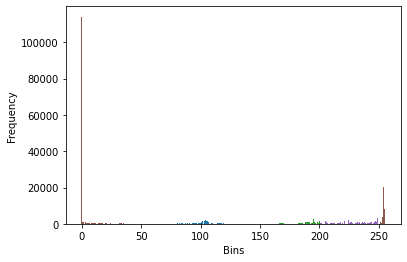

In [7]:
count_of_pixels = make_dict(img)
probability = calculate_probability(count_of_pixels,sum(count_of_pixels.values()))

cumilative_probability = calculate_cumilative_probability(probability)

cumilative_probability.update((x, round(y*255)) for x, y in cumilative_probability.items())

for levels in level_adjustments:
    for size in Window_size:
        new_image = update_image(img,cumilative_probability,levels,size)
        cv2.imwrite("new_image_level_"+str(levels)+"_windowSize_"+str(size)+".jpg",new_image)
        x=[]
        y=[]
        sum=0
        for x1,y1 in make_dict(new_image).items():
            x.append(x1)
            y.append(y1)
        plt.bar(x,y,align='center') # A bar chart
        plt.xlabel('Bins')
        plt.ylabel('Frequency')
        plt.savefig("FinalGraph_level_"+str(levels)+"_windowSize_"+str(size)+".jpg")

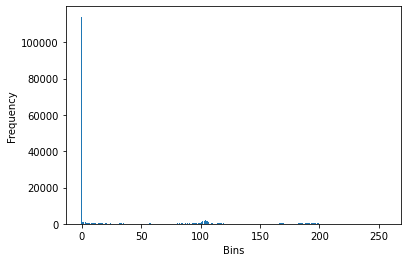

In [8]:
x=[]
y=[]
sum=0
for x1,y1 in count_of_pixels.items():
    x.append(x1)
    y.append(y1)
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.savefig("Initial_graph.jpg")